In [533]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [534]:
df=pd.read_csv('../csv/dataset_ml.csv')

In [535]:
df=df.drop(['id_advert','city'],axis=1)

In [536]:
# Séparer les variables indépendantes (X) de la variable cible (y)
X = df.drop("scam", axis=1)
y = df["scam"]

In [537]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [538]:
# Définir les colonnes nécessitant une normalisation
numerical_cols = ['size','price','other_campus_dressing','other_campus_sell','hype_products_dressing',
                 'hype_products_sell','item_count','total_items_count','given_item_count','taken_item_count',
                 'feedback_reputation','followers_count','following_count']
binary_categorical_cols = ['price_decimal','ressell_price','promoted','identic_title_description','short_description',
                      'secure_description','has_emoji_description','description_user','sell_sneaker_account','photo',
                      'is_publish_photos_agreed','expose_location','verification_facebook','verification_google','verification_phone'] 
other_categorical_cols = ['gender','brand','country_title','modele']

In [539]:
# Définir les transformations pour les colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Normaliser les variables numériques
        ('bin_cat', 'passthrough', binary_categorical_cols),  # Ne rien faire pour les colonnes binaires
        ('other_cat', OneHotEncoder(handle_unknown='ignore'), other_categorical_cols)  # Appliquer OneHotEncoder aux autres colonnes catégorielles
    ])

## Baseline Model

In [540]:
# Créer le pipeline avec le préprocesseur et le modèle RandomForest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [541]:
# Entraîner le modèle
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['size',
                                                   'other_campus_dressing',
                                                   'other_campus_sell',
                                                   'hype_products_dressing',
                                                   'hype_products_sell',
                                                   'item_count',
                                                   'total_items_count',
                                                   'given_item_count',
                                                   'taken_item_count',
                                                   'feedback_reputation',
                                                   'followers_count',
                                                   'following_count']),
                                                 ('bin_cat', 'passthrough',
                                                  ['price_...
                                                   'secure_description',
                                                   'has_emoji_description',
                                                   'description_user',
                                                   'sell_sneaker_account',
                                                   'photo',
                                                   'is_publish_photos_agreed',
                                                   'expose_location',
                                                   'verification_facebook',
                                                   'verification_google',
                                                   'verification_phone']),
                                                 ('other_cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'brand',
                                                   'country_title',
                                                   'modele'])])),
                ('classifier', RandomForestClassifier())])

In [542]:
# Prédire sur l'ensemble d'entraînement
y_train_pred = pipeline.predict(X_train)

# Prédire sur l'ensemble de test
y_test_pred = pipeline.predict(X_test)

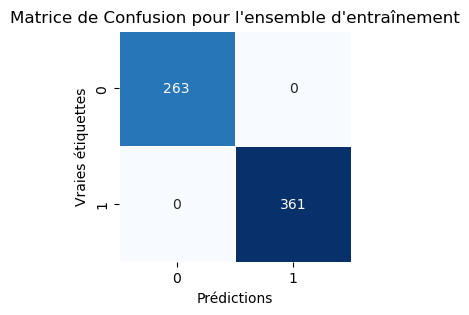

In [543]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_train, y_train_pred)

# Utiliser Seaborn pour l'affichage
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.title('Matrice de Confusion pour l\'ensemble d\'entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [544]:
# Afficher les métriques de classification pour l'ensemble d'entraînement
print("Métriques pour l'ensemble d'entraînement:")
print(classification_report(y_train, y_train_pred))

Métriques pour l'ensemble d'entraînement:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       361

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624



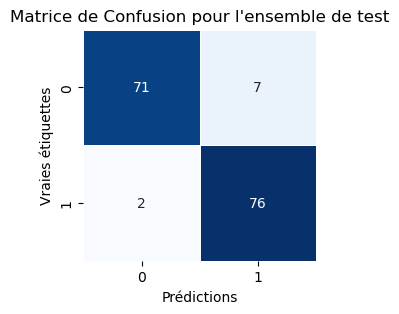

In [545]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)

# Utiliser Seaborn pour l'affichage
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.title('Matrice de Confusion pour l\'ensemble de test')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [546]:
# Afficher les métriques de classification pour l'ensemble de test
print("Métriques pour l'ensemble de test:")
print(classification_report(y_test, y_test_pred))

Métriques pour l'ensemble de test:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        78
           1       0.92      0.97      0.94        78

    accuracy                           0.94       156
   macro avg       0.94      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156



In [547]:
incorrect_predictions = X_test[y_test != y_test_pred]
incorrect_predictions

,modele,size,brand,price,price_decimal,ressell_price,promoted,identic_title_description,short_description,secure_description,...,followers_count,following_count,gender,photo,is_publish_photos_agreed,expose_location,country_title,verification_facebook,verification_google,verification_phone
149,brown,38.0,adidas,120.00,0,121,0,0,0,0,...,2,1,F,1,1,0,Frankreich,1,0,1
128,grey,36.0,adidas,101.05,1,188,0,1,1,0,...,9,6,F,1,0,0,France,1,0,1
82,black,37.5,adidas Originals,86.35,1,111,0,0,0,0,...,1,0,not_specified,1,0,1,France,0,0,1
774,purple,37.0,adidas,170.00,0,115,0,0,0,0,...,0,0,not_specified,0,0,0,France,0,0,0
277,black,39.0,adidas Originals,96.00,0,129,0,0,0,1,...,4,11,not_specified,1,0,1,France,0,0,0
517,grey,42.0,adidas,130.00,0,271,0,0,1,0,...,1,0,M,0,0,1,France,1,0,1
757,grey,40.0,adidas,150.00,0,231,0,0,0,1,...,0,0,M,1,0,0,France,0,0,1
64,black,42.0,adidas,85.00,0,110,0,1,1,0,...,0,0,not_specified,1,0,1,France,0,0,0
253,beige,38.0,adidas,140.00,0,129,0,0,0,1,...,0,0,not_specified,0,0,1,Frankreich,0,0,1


## Optimisation

In [548]:
# Définition du pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [549]:
# Définition des paramètres de la grille
param_grid = {
    'classifier__n_estimators': [20,30,50,100, 200],
    'classifier__max_depth': [None,2,3,5, 10, 20, 30]
}

In [550]:
#Utilisation du gridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5)

In [551]:
#Entraînement du modèle
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['size',
                                                                          'other_campus_dressing',
                                                                          'other_campus_sell',
                                                                          'hype_products_dressing',
                                                                          'hype_products_sell',
                                                                          'item_count',
                                                                          'total_items_count',
                                                                          'given_item_count',
                                                                          'taken_item_count',
                                                                          'feedback_reputation',
                                                                          'followers_count',
                                                                          'following_count']),
                                                                        ('bin...
                                                                          'is_publish_photos_agreed',
                                                                          'expose_location',
                                                                          'verification_facebook',
                                                                          'verification_google',
                                                                          'verification_phone']),
                                                                        ('other_cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'brand',
                                                                          'country_title',
                                                                          'modele'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 2, 3, 5, 10, 20, 30],
                         'classifier__n_estimators': [20, 30, 50, 100, 200]},
             scoring='f1')

In [552]:
# Meilleurs paramètres
best_model = grid_search.best_estimator_
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

Meilleurs paramètres trouvés :  {'classifier__max_depth': 10, 'classifier__n_estimators': 100}


In [553]:
# Prédire sur l'ensemble d'entraînement
y_train_pred_best = best_model.predict(X_train)

# Prédire sur l'ensemble de test
y_test_pred_best = best_model.predict(X_test)

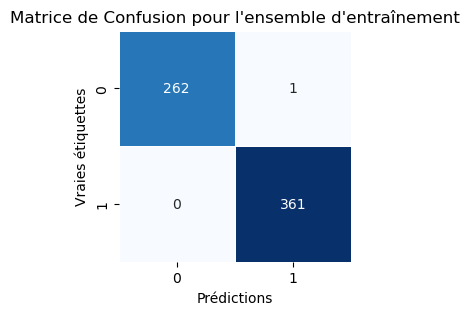

In [554]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_train, y_train_pred_best)

# Utiliser Seaborn pour l'affichage
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.title('Matrice de Confusion pour l\'ensemble d\'entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [555]:
# Afficher les métriques de classification pour l'ensemble d'entraînement
print("Métriques pour l'ensemble d'entraînement:")
print(classification_report(y_train, y_train_pred_best))

Métriques pour l'ensemble d'entraînement:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       361

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624



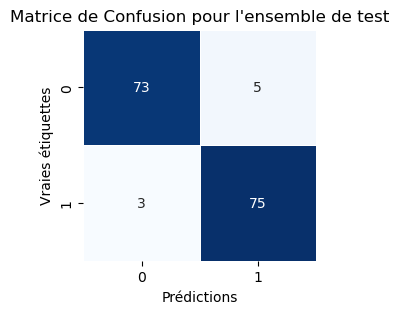

In [556]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_test_pred_best)

# Utiliser Seaborn pour l'affichage
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.title('Matrice de Confusion pour l\'ensemble de test')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [557]:
# Afficher les métriques de classification pour l'ensemble de test
print("Métriques pour l'ensemble de test:")
print(classification_report(y_test, y_test_pred_best))

Métriques pour l'ensemble de test:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        78
           1       0.94      0.96      0.95        78

    accuracy                           0.95       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.95      0.95      0.95       156



In [558]:
incorrect_predictions = X_test[y_test != y_test_pred_best]
incorrect_predictions

,modele,size,brand,price,price_decimal,ressell_price,promoted,identic_title_description,short_description,secure_description,...,followers_count,following_count,gender,photo,is_publish_photos_agreed,expose_location,country_title,verification_facebook,verification_google,verification_phone
149,brown,38.0,adidas,120.00,0,121,0,0,0,0,...,2,1,F,1,1,0,Frankreich,1,0,1
128,grey,36.0,adidas,101.05,1,188,0,1,1,0,...,9,6,F,1,0,0,France,1,0,1
82,black,37.5,adidas Originals,86.35,1,111,0,0,0,0,...,1,0,not_specified,1,0,1,France,0,0,1
357,black,38.0,adidas,120.00,0,118,0,0,1,0,...,0,0,F,0,0,1,France,0,0,1
774,purple,37.0,adidas,170.00,0,115,0,0,0,0,...,0,0,not_specified,0,0,0,France,0,0,0
277,black,39.0,adidas Originals,96.00,0,129,0,0,0,1,...,4,11,not_specified,1,0,1,France,0,0,0
517,grey,42.0,adidas,130.00,0,271,0,0,1,0,...,1,0,M,0,0,1,France,1,0,1
64,black,42.0,adidas,85.00,0,110,0,1,1,0,...,0,0,not_specified,1,0,1,France,0,0,0
